In [1]:
%%capture
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

!mim install mmdet

!mim download mmdet --config faster-rcnn_x101-32x8d_fpn_ms-3x_coco --dest .

In [ ]:
# !python demo/image_demo.py demo/demo.jpg faster-rcnn_x101-32x8d_fpn_ms-3x_coco --weights faster_rcnn_x101_32x8d_fpn_mstrain_3x_coco_20210604_182954-002e082a.pth --device cpu

# pascal voc2007

In [ ]:
#@title
# %cd /content/mmdetection
# !wget https://download.openmmlab.com/mmdetection/v2.0/pascal_voc/faster_rcnn_r50_fpn_1x_voc0712/faster_rcnn_r50_fpn_1x_voc0712_20220320_192712-54bef0f3.pth

In [ ]:
#@title
# %%capture
# # unzip
# !python tools/misc/download_dataset.py --dataset-name voc2007
# %cd data/
# !tar -xf /content/mmdetection/data/coco/VOCdevkit_08-Jun-2007.tar -C /content/mmdetection/data/
# !tar -xf /content/mmdetection/data/coco/VOCtest_06-Nov-2007.tar -C /content/mmdetection/data/
# !tar -xf /content/mmdetection/data/coco/VOCtrainval_06-Nov-2007.tar -C /content/mmdetection/data/

# %cd /content/mmdetection/

In [ ]:
#@title
# !python tools/test.py \
#     /content/mmdetection/configs/faster_rcnn/faster-rcnn_r101_fpn_1x_coco.py \
#     /content/mmdetection/mmdetection/huhu.pth \
#     --show \
#     --out /content/results.pkl

# COCO dataset

In [ ]:
!python /content/mmdetection/tools/misc/download_dataset.py --dataset-name coco2017 --unzip

Streaming output truncated to the last 5000 lines.
 80% 14.3G/18.0G [07:43<01:56, 33.9MB/s]


 73% 13.7G/18.7G [07:43<02:44, 33.0MB/s]
 80% 14.3G/18.0G [07:43<01:54, 34.5MB/s]


 73% 13.7G/18.7G [07:43<02:31, 35.8MB/s]
 80% 14.3G/18.0G [07:43<01:49, 36.2MB/s]


 73% 13.7G/18.7G [07:43<02:31, 35.8MB/s]
 80% 14.3G/18.0G [07:43<01:52, 35.0MB/s]


 73% 13.7G/18.7G [07:43<02:38, 34.2MB/s]
 80% 14.3G/18.0G [07:43<01:56, 33.9MB/s]


 73% 13.7G/18.7G [07:43<02:37, 34.6MB/s]
 80% 14.3G/18.0G [07:43<01:54, 34.2MB/s]


 73% 13.7G/18.7G [07:43<02:35, 35.0MB/s]
 80% 14.4G/18.0G [07:43<01:54, 34.3MB/s]


 73% 13.7G/18.7G [07:43<02:47, 32.5MB/s]
 80% 14.4G/18.0G [07:43<02:11, 29.9MB/s]


 73% 13.7G/18.7G [07:43<02:39, 33.9MB/s]
 80% 14.4G/18.0G [07:44<01:57, 33.3MB/s]


 73% 13.7G/18.7G [07:43<02:39, 33.9MB/s]


 73% 13.7G/18.7G [07:44<02:43, 33.0MB/s]
 80% 14.4G/18.0G [07:44<02:04, 31.5MB/s]


 73% 13.7G/18.7G [07:44<02:34, 34.9MB/s]
 80% 14.4G/18.0G [07:44<01:53, 34.5MB/s]


 73% 13.7G/18.7G [07:44

In [ ]:
!python /content/mmdetection/tools/test.py \
    /content/mmdetection/faster-rcnn_x101-32x8d_fpn_ms-3x_coco.py \
    /content/mmdetection/faster_rcnn_x101_32x8d_fpn_mstrain_3x_coco_20210604_182954-002e082a.pth \
    --show \
    # --out /content/results.pkl

04/30 09:47:25 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1334294111
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

In [2]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [3]:
config_file = '/content/mmdetection/faster-rcnn_x101-32x8d_fpn_ms-3x_coco.py'
checkpoint_file = '/content/mmdetection/faster_rcnn_x101_32x8d_fpn_mstrain_3x_coco_20210604_182954-002e082a.pth'

In [4]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: /content/mmdetection/faster_rcnn_x101_32x8d_fpn_mstrain_3x_coco_20210604_182954-002e082a.pth


In [6]:
# test a single image
# !pip install ipython-autotime
import time
start = time.time()
img = mmcv.imread( '/content/Rr.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)
end = time.time()
print(end - start)
# %reload_ext autotime

<DetDataSample(

    META INFORMATION
    img_id: 0
    img_shape: (800, 1280)
    batch_input_shape: (800, 1280)
    scale_factor: (0.6666666666666666, 0.6666666666666666)
    pad_shape: (800, 1280)
    img_path: None
    ori_shape: (1200, 1920)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([ 0, 17, 17,  0, 17,  0, 18,  0, 18,  0, 18, 18, 77, 17, 17, 17, 14, 17,
                        17, 17, 16,  0, 17,  0], device='cuda:0')
            scores: tensor([0.9962, 0.9958, 0.9931, 0.9908, 0.9717, 0.8478, 0.8034, 0.7841, 0.6958,
                        0.5275, 0.4363, 0.3121, 0.2957, 0.2205, 0.1501, 0.1285, 0.1237, 0.1121,
                        0.0656, 0.0634, 0.0595, 0.0541, 0.0528, 0.0522], device='cuda:0')
            bboxes: tensor([[ 525.1824,  512.0612,  624.5860,  759.9285],
                        [ 842.2747,  767.5220, 1153.3750, 1006.6680],
                        [ 423.8425

04/30 15:58:43 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


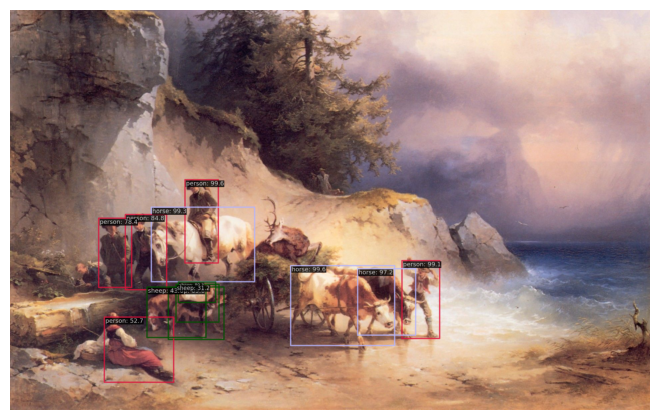

In [7]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

Output times for faster rcnn:
 
0.34107255935668945 <br>
0.23136043548583984 <br>
0.25797009468078613 <br>
0.2546205520629883 <br>
0.2588615417480469 <br>
0.2588779926300049 <br>
0.22840547561645508 <br>
0.2549862861633301 <br>
0.24387454986572266 <br>
0.22632360458374023 <br>
0.2299489974975586 <br>